## 模擬資料

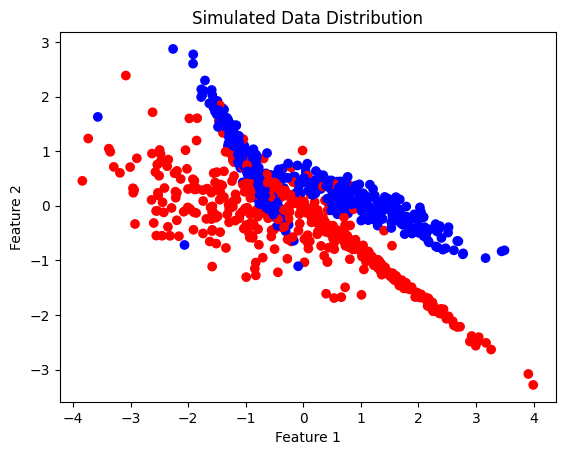


Accuracy: 0.89
Recall: 0.8484848484848485
Precision: 0.9230769230769231
F1-score: 0.8842105263157896
AUC: 0.9522952295229523


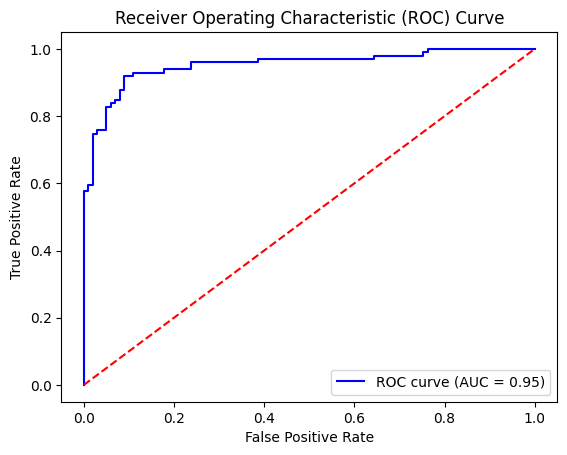

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, accuracy_score, auc
import matplotlib.pyplot as plt

# 生成二分類模擬資料
X, y = make_classification(n_samples=1000, n_features=4, random_state=42)

# 將數據集切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建支持向量機模型
model = SVC()

# 使用訓練集訓練模型
model.fit(X_train, y_train)

# 使用訓練好的模型進行預測
y_pred = model.predict(X_test)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
# 計算Recall
recall = recall_score(y_test, y_pred)
# 計算Precision
precision = precision_score(y_test, y_pred)
# 計算F1-score
f1 = f1_score(y_test, y_pred)
# 獲取分類氣的得分
y_scores = model.decision_function(X_test)
# 計算ROC曲線
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# 計算AUC
auc_score = auc(fpr, tpr)

# 繪製模擬資料分布圖
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Simulated Data Distribution')
plt.show()

print()
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-score:", f1)
print("AUC:", auc_score)

# 繪製ROC曲線
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 真實資料

資料集連結:<br>
Heart Failure Prediction<br>
https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

## SVM

In [ ]:
import pandas as pd

# 讀取 CSV文件
data = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')

# 統計 0 和 1 的數量
counts = data['DEATH_EVENT'].value_counts()

print(counts)

0    203
1     96
Name: DEATH_EVENT, dtype: int64


原始資料訓練


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


準確率： 0.5833333333333334
分類報告：
               precision    recall  f1-score   support

           0       0.58      1.00      0.74        35
           1       0.00      0.00      0.00        25

    accuracy                           0.58        60
   macro avg       0.29      0.50      0.37        60
weighted avg       0.34      0.58      0.43        60

混淆矩陣：
 [[35  0]
 [25  0]]


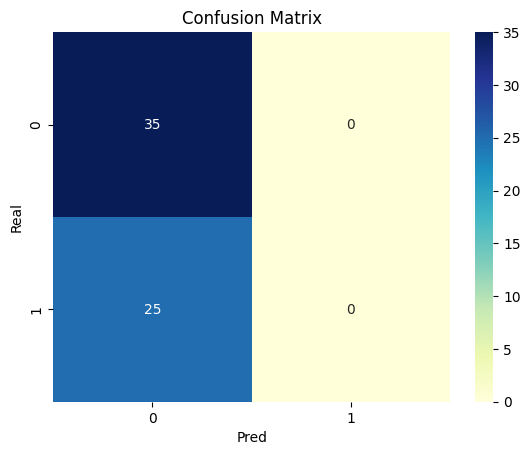

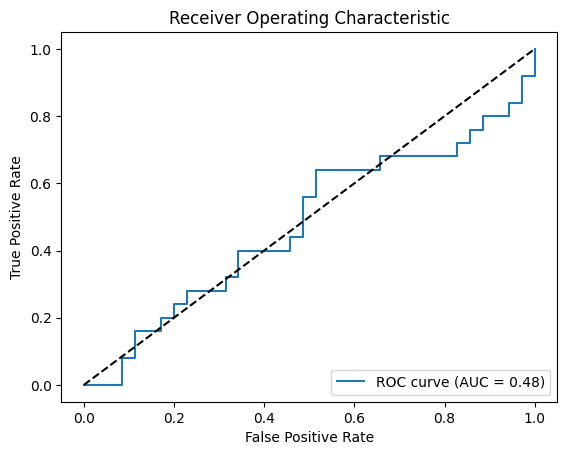

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取資料集
data = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')

# 切分特徵和目標變數
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# 資料打亂
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立 SVM 模型
svm_model = SVC()
# svm_model = SVC(C =0.7, kernel= 'linear', random_state=1, probability= True)
svm_model.fit(X_train, y_train)

# 預測測試資料
y_pred = svm_model.predict(X_test)
y_pred_scores = svm_model.decision_function(X_test)  # 使用 decision_function 取得分數

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_scores)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_scores)

# 印出結果
print("準確率：", accuracy)
print("分類報告：\n", classification_report)
print("混淆矩陣：\n", confusion_mat)

# 可視化混淆矩陣
sns.heatmap(confusion_mat, annot=True, cmap="YlGnBu")
plt.xlabel('Pred')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

# 繪製 ROC 曲線
fpr, tpr, thresholds = roc_curve(y_test, y_pred_scores)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # 對角線
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

數據過採樣

準確率： 0.5833333333333334
分類報告：
               precision    recall  f1-score   support

           0       0.60      0.86      0.71        35
           1       0.50      0.20      0.29        25

    accuracy                           0.58        60
   macro avg       0.55      0.53      0.50        60
weighted avg       0.56      0.58      0.53        60

混淆矩陣：
 [[30  5]
 [20  5]]


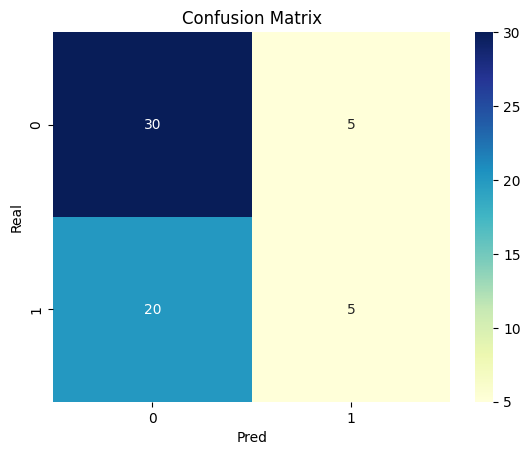

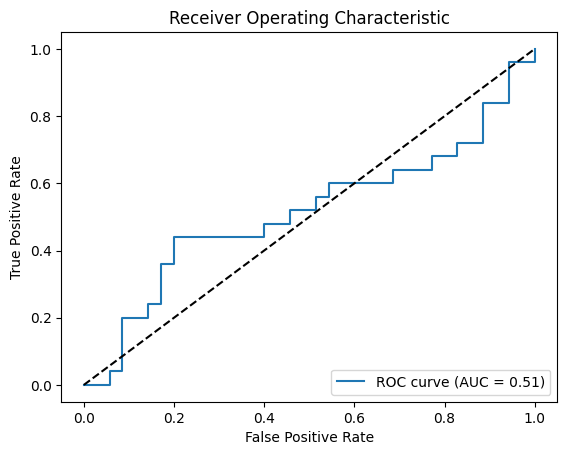

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

# 讀取資料集
data = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')

# 切分特徵和目標變數
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# 資料打亂
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#進行數據降採樣
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)


# 建立 SVM 模型
svm_model = SVC()
svm_model.fit(X_train_undersampled, y_train_undersampled)

# 預測測試資料
y_pred = svm_model.predict(X_test)
y_pred_scores = svm_model.decision_function(X_test)  # 使用 decision_function 取得分數

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_scores)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_scores)

# 印出結果
print("準確率：", accuracy)
print("分類報告：\n", classification_report)
print("混淆矩陣：\n", confusion_mat)

# 可視化混淆矩陣
sns.heatmap(confusion_mat, annot=True, cmap="YlGnBu")
plt.xlabel('Pred')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

# 繪製 ROC 曲線
fpr, tpr, thresholds = roc_curve(y_test, y_pred_scores)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # 對角線
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

數據降採樣


準確率： 0.5833333333333334
分類報告：
               precision    recall  f1-score   support

           0       0.60      0.86      0.71        35
           1       0.50      0.20      0.29        25

    accuracy                           0.58        60
   macro avg       0.55      0.53      0.50        60
weighted avg       0.56      0.58      0.53        60

混淆矩陣：
 [[30  5]
 [20  5]]


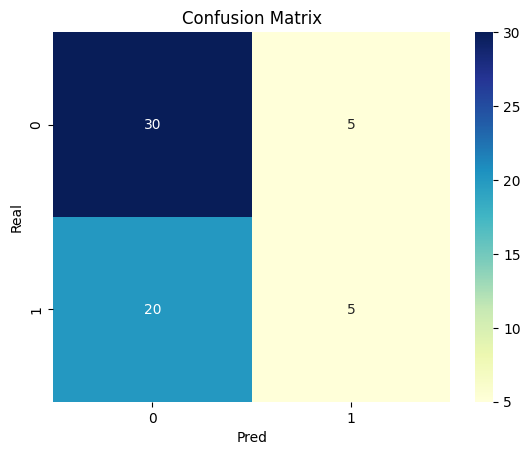

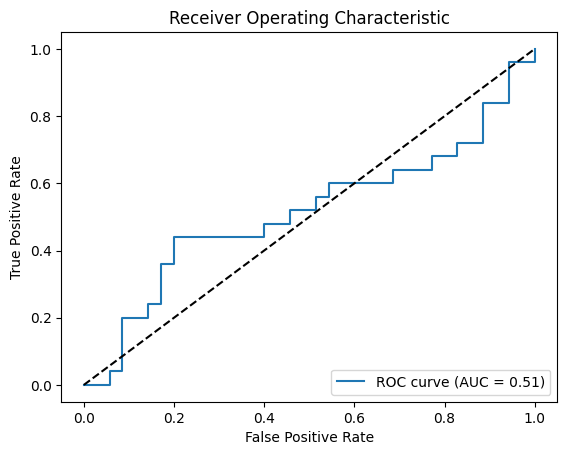

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取資料集
data = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')

# 切分特徵和目標變數
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# 資料打亂
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立 SVM 模型
svm_model = SVC()
# svm_model = SVC(C =0.7, kernel= 'linear', random_state=1, probability= True)
svm_model.fit(X_train, y_train)

# 預測測試資料
y_pred = svm_model.predict(X_test)
y_pred_scores = svm_model.decision_function(X_test)  # 使用 decision_function 取得分數

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_scores)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_scores)

# 印出結果
print("準確率：", accuracy)
print("分類報告：\n", classification_report)
print("混淆矩陣：\n", confusion_mat)

# 可視化混淆矩陣
sns.heatmap(confusion_mat, annot=True, cmap="YlGnBu")
plt.xlabel('Pred')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

# 繪製 ROC 曲線
fpr, tpr, thresholds = roc_curve(y_test, y_pred_scores)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # 對角線
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()